In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import seaborn as sns

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from matplotlib import rc

palette = ['#ff3b30', '#ffcc00', '#4cd964', '#007aff', '#5856d6', '#ff9500', '#5ac8fa', '#ff2d55']
markers = ['o', '^', '<', 'd', '*', '2']
sns.set_style("ticks")
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth'] = 1
rc("font", **{'family': 'serif', 'serif': ['Palatino'], 'size': 14})
rc('text', usetex=True)

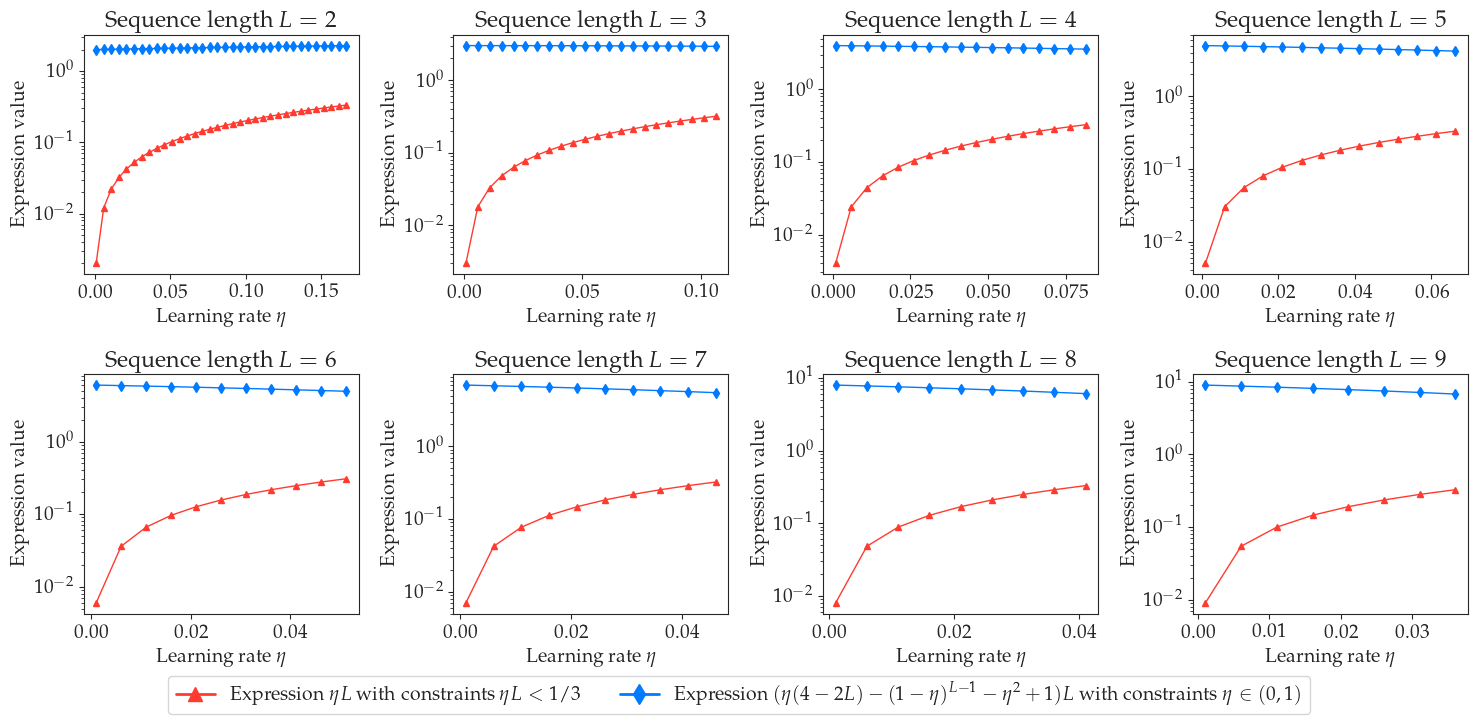

In [41]:


# %%
def compute_expressions(eta, L):
    # Compute the first expression: eta * L
    expr1 = eta * L
    
    # Compute the second expression
    term1 = eta * (4 - 2 * L)
    term2 = (1 - eta)**(L - 1)
    term3 = eta**2 - 1
    expr2 = (term1 - term2 - term3 + 1) * L
    
    return expr1, expr2



# ###########

# Define the range for eta and L
eta_values = np.linspace(0.001, 1, 200)  # 100 values from 0.001 to 0.2

# Range of L values
L_values = range(2, 10)  # Values from 2 to 20

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))  # 5 rows, 4 columns

# Flatten axes array for easy indexing
axes = axes.flatten()

for idx, L in enumerate(L_values):
    expr1_values = np.zeros_like(eta_values)
    expr2_values = np.zeros_like(eta_values)

    for i, eta in enumerate(eta_values):
        expr1, expr2 = compute_expressions(eta, L)
        if eta * L < 1/3:
            expr1_values[i] = expr1
            expr2_values[i] = expr2
        else:
            expr1_values[i] = np.nan
            expr2_values[i] = np.nan
        

    ax = axes[idx]
    ax.plot(eta_values, expr1_values, color=palette[0],markersize=5, marker=markers[1])
    ax.plot(eta_values, expr2_values, color=palette[3], markersize=5, marker=markers[3])
    ax.set_title(r'Sequence length $L = '+str(L)+r"$")
    ax.set_xlabel('Learning rate $\eta$')
    ax.set_ylabel('Expression value')
    # ax.legend()
    ax.set_yscale('log') 

# fig.legend([, ], 
#            loc='lower center', bbox_to_anchor=(0.5, -0.09), ncol=2, fontsize=16)

# Create custom legend handles with larger markers
legend_handles = [
    Line2D([0], [0],  color=palette[0], marker=markers[1], lw=2,  markersize=10, label='Expression $\eta L$ with constraints $\eta L < 1/3$'),
    Line2D([0], [0], color=palette[3],  marker=markers[3], lw=2, markersize=10, label='Expression $(\eta (4 - 2L) - (1 - \eta)^{L-1} - \eta^2 + 1) L$ with constraints $\eta\in(0,1)$')
]

# Add common legend at the bottom
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize='medium')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('expression_comparison.pdf', bbox_inches='tight')